In [1]:
import yfinance as yf

# Define the stock ticker and date range
ticker = "MSFT"
start_date = "2023-01-01"
end_date = "2023-08-01"

# Fetch historical data
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.956345,25740000
2023-01-04,232.279999,232.869995,225.960007,229.100006,227.547363,50623400
2023-01-05,227.199997,227.550003,221.759995,222.309998,220.803360,39585600
2023-01-06,223.000000,225.759995,219.350006,224.929993,223.405609,43613600
2023-01-09,226.449997,231.240005,226.410004,227.119995,225.580780,27369800
...,...,...,...,...,...,...
2023-07-25,347.109985,351.890015,345.070007,350.980011,350.238464,41637700
2023-07-26,341.440002,344.670013,333.109985,337.769989,337.056366,58383700
2023-07-27,340.480011,341.329987,329.049988,330.720001,330.021271,39635300


In [3]:
#split the data into a training set (80% of data) and a test set (20% of data)
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

In [4]:
# Normalize the data to scale it between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data["Close"].values.reshape(-1, 1))
test_scaled = scaler.transform(test_data["Close"].values.reshape(-1, 1))

In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,243.080002,245.750000,237.399994,239.580002,237.956345,25740000
2023-01-04,232.279999,232.869995,225.960007,229.100006,227.547363,50623400
2023-01-05,227.199997,227.550003,221.759995,222.309998,220.803360,39585600
2023-01-06,223.000000,225.759995,219.350006,224.929993,223.405609,43613600
2023-01-09,226.449997,231.240005,226.410004,227.119995,225.580780,27369800
...,...,...,...,...,...,...
2023-07-25,347.109985,351.890015,345.070007,350.980011,350.238464,41637700
2023-07-26,341.440002,344.670013,333.109985,337.769989,337.056366,58383700
2023-07-27,340.480011,341.329987,329.049988,330.720001,330.021271,39635300


In [6]:
# Build the LSTM model using Tensorflow,Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_scaled.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
# Train the model using the training data
model.fit(train_scaled, train_scaled, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
8/8 [==============================] - 8s 9ms/step - loss: 0.2630
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2223
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.1797
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.1358
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0904
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0548
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0310
Epoch 8/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0257
Epoch 9/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0251
Epoch 10/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0220
Epoch 11/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0198
Epoch 12/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0178
Epoch 13/50
8/8 [==============================] - 0s 10ms/step - loss:

In [8]:
# Evaluate the model performance using the test data
test_inputs = test_scaled
predictions = model.predict(test_inputs)
predictions = scaler.inverse_transform(predictions)

# Calculate RMSE or any other appropriate metric to evaluate accuracy
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_data["Close"], predictions, squared=False)
print("Root Mean Squared Error:", rmse)

1/1 [==============================] - 2s 2s/step
Root Mean Squared Error: 4.5159975264863625


In [9]:
from sklearn.metrics import mean_absolute_error
# Calculate MAE
mae = mean_absolute_error(test_data["Close"], predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4.181156553071121


In [10]:
# Calculate MSE
mse = mean_squared_error(test_data["Close"], predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 20.39423365923094


In [11]:
# Calculate R-squared
from sklearn.metrics import r2_score

r2 = r2_score(test_data["Close"], predictions)
print("R-squared:", r2)

R-squared: 0.5811052154395366


In [12]:
import numpy as np

# Ensure predictions is a 1-dimensional array
predictions_1d = predictions.flatten()

# Calculate MAPE
mape = np.mean(np.abs((test_data["Close"] - predictions_1d) / test_data["Close"])) * 100
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 1.220838771991457


In [13]:
# Calculate predicted price
last_day_price = test_data.iloc[-1]["Close"]
last_day_scaled = scaler.transform(last_day_price.reshape(-1, 1))
prediction = model.predict(last_day_scaled)
predicted_price = scaler.inverse_transform(prediction)
print("Predicted Price:", predicted_price)

1/1 [==============================] - 0s 53ms/step
Predicted Price: [[339.13547]]


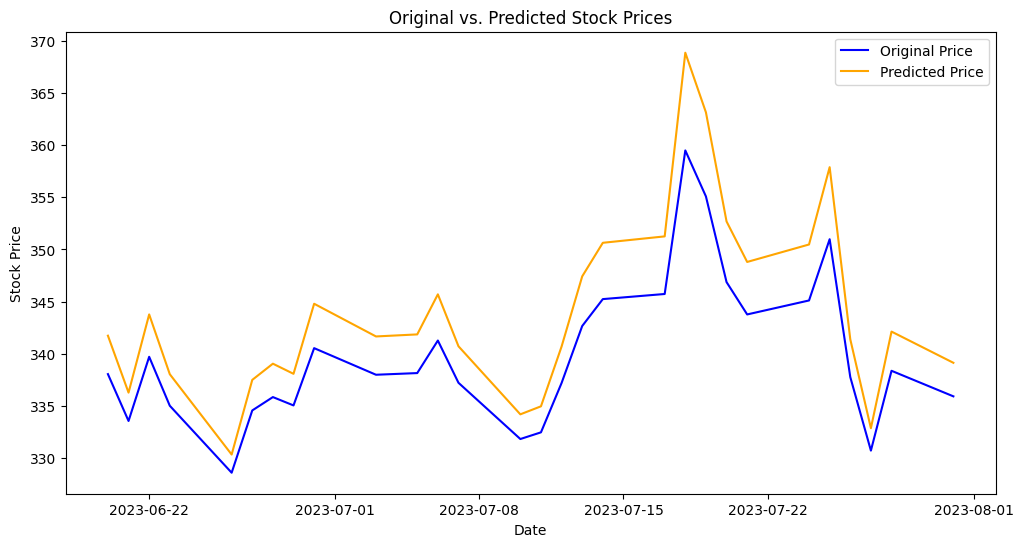

In [14]:
# Original VS Predicted Stock Prices Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data["Close"], label="Original Price", color="blue")
plt.plot(test_data.index, predictions, label="Predicted Price", color="orange")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Original vs. Predicted Stock Prices")
plt.legend()
plt.show()

Epoch 1/50
8/8 [==============================] - 0s 10ms/step - loss: 3.2398e-04
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 3.1429e-04
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 3.1480e-04
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 3.0550e-04
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 3.0139e-04
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 3.0176e-04
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 2.9967e-04
Epoch 8/50
8/8 [==============================] - 0s 9ms/step - loss: 3.0157e-04
Epoch 9/50
8/8 [==============================] - 0s 9ms/step - loss: 2.7720e-04
Epoch 10/50
8/8 [==============================] - 0s 10ms/step - loss: 3.0398e-04
Epoch 11/50
8/8 [==============================] - 0s 9ms/step - loss: 2.6841e-04
Epoch 12/50
8/8 [==============================] - 0s 11ms/step - loss: 2.7503e-04
Epoch 13/50
8/8 [===

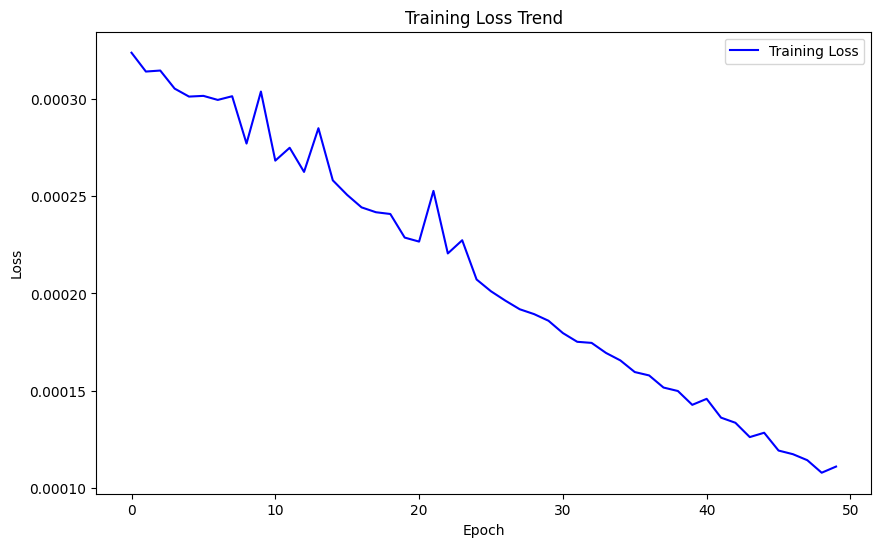

In [15]:
# Loss trend during training visualization 
history = model.fit(train_scaled, train_scaled, epochs=50, batch_size=16, verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label="Training Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Trend")
plt.legend()
plt.show()

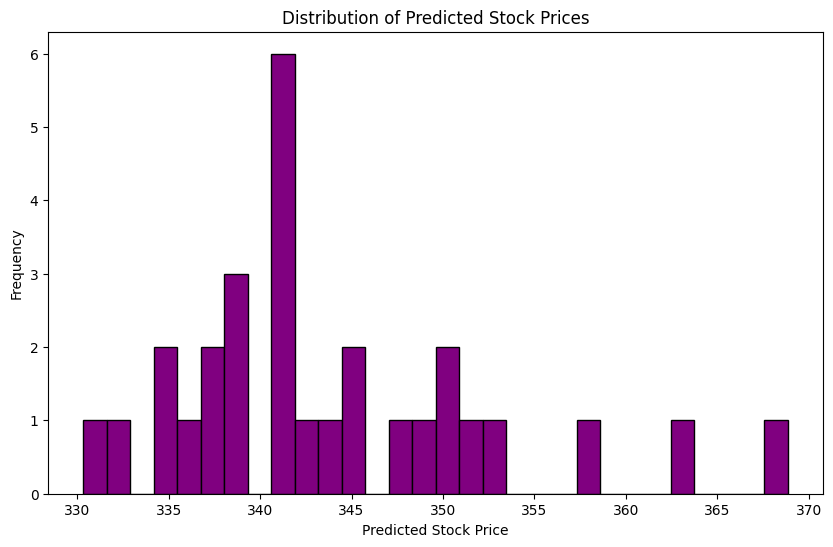

In [16]:
# Distribution of Predicted Stock Prices Visualization
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=30, color="purple", edgecolor="black")
plt.xlabel("Predicted Stock Price")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Stock Prices")
plt.show()

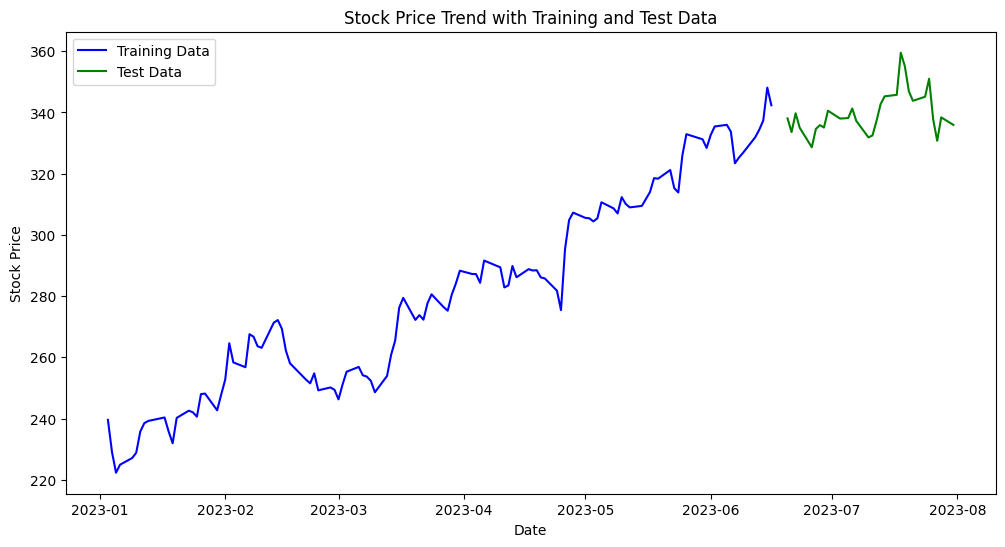

In [17]:
# Stock Price Trend with Training and Test Data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data["Close"], label="Training Data", color="blue")
plt.plot(test_data.index, test_data["Close"], label="Test Data", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Trend with Training and Test Data")
plt.legend()
plt.show()

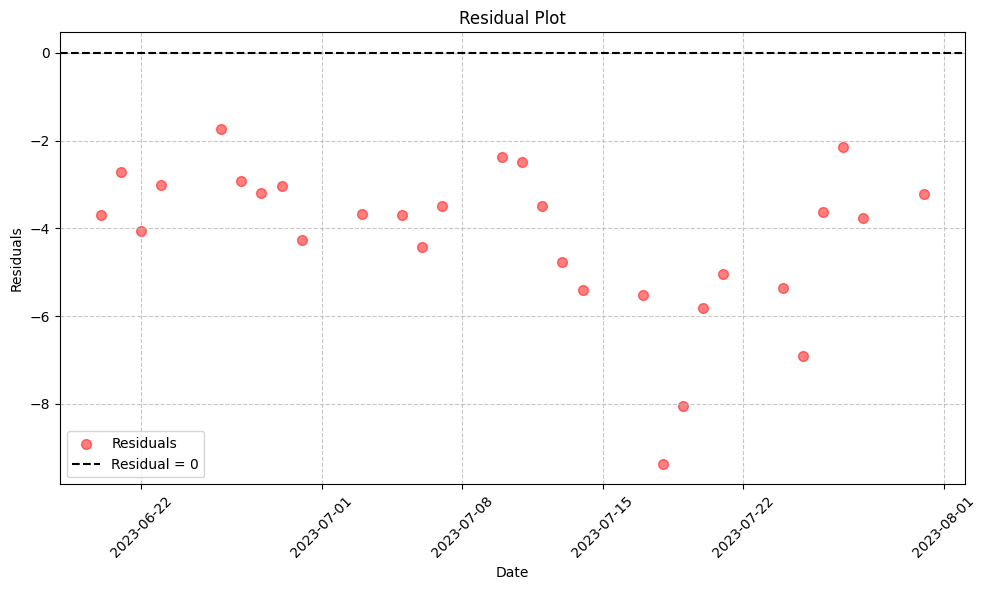

In [19]:
# Visualize the differences between the predicted and actual values using residual plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Calculate residuals
residuals = test_data["Close"] - predictions[:, 0]

# Create the scatter plot
plt.scatter(test_data.index, residuals, color="red", alpha=0.5, marker='o', s=50, label="Residuals")

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--', label="Residual = 0")

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

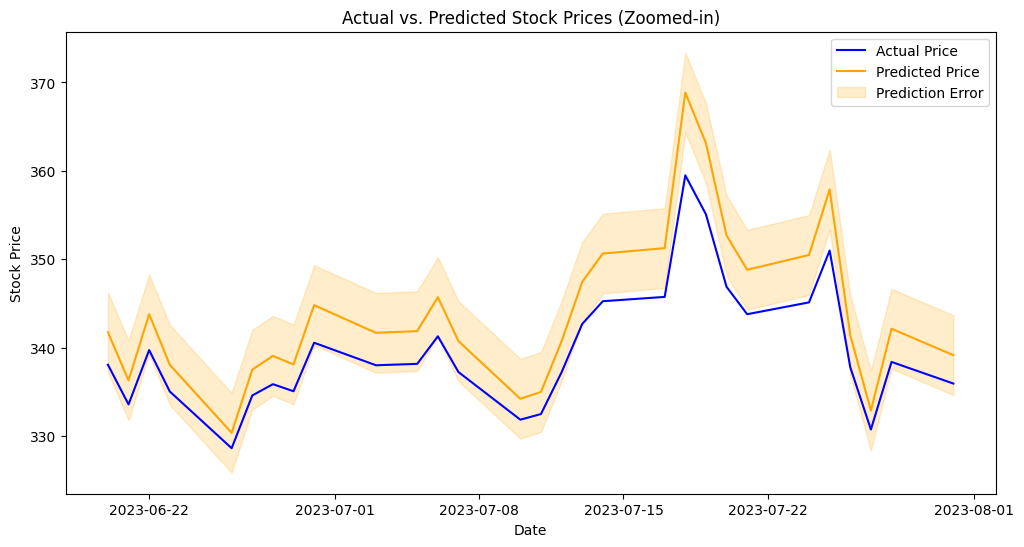

In [20]:
# Actual VS Predicted Stock Prices (Zoomed-in)
zoom_start_date = "2023-06-01"
zoom_end_date = "2023-07-31"
zoom_data = test_data[(test_data.index >= zoom_start_date) & (test_data.index <= zoom_end_date)]

plt.figure(figsize=(12, 6))
plt.plot(zoom_data.index, zoom_data["Close"], label="Actual Price", color="blue")
plt.plot(zoom_data.index, predictions[-len(zoom_data):], label="Predicted Price", color="orange")
plt.fill_between(zoom_data.index, predictions[-len(zoom_data):, 0] - rmse, predictions[-len(zoom_data):, 0] + rmse, color='orange', alpha=0.2, label="Prediction Error")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices (Zoomed-in)")
plt.legend()
plt.show()

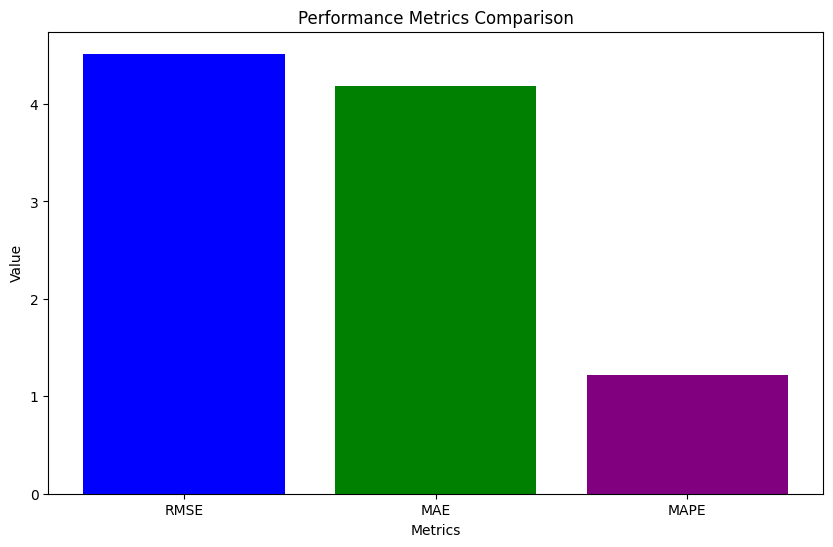

In [21]:
# Performance Metrics Comparison
metric_names = ["RMSE", "MAE", "MAPE"]
metric_values = [rmse, mae, mape]

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color=["blue", "green", "purple"])
plt.xlabel("Metrics")
plt.ylabel("Value")
plt.title("Performance Metrics Comparison")
plt.show()